### I wanted to revisit this project. I used linear regression and scikit-learn’s random forest instead of TensorFlow Decision Forests. I also wanted more control over how I handled missing values, transformed the target, and prepared the features so I could learn more about each step of the process. Tensor flow still did better though.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data = pd.read_csv('/kaggle/input/house-prices-data/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.info()
# Types int, obj, float
# No booleans's

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
data.describe()
# 1460 Houses

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Electrical         1
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageYrBlt       81
GarageType        81
LotFrontage      259
FireplaceQu      690
MasVnrType       872
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64


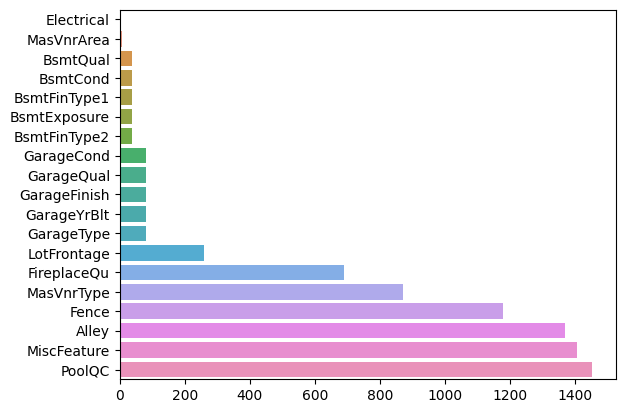

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values()
print(missing_data)

sns.barplot(x = missing_data.values, y = missing_data.index)
plt.show()

In [6]:
'''
Fence           1179
Alley           1369'
MiscFeature     1406
PoolQC          1453
Dropping thes 4 because a large majority of data is missing
'''
data = data.drop(columns = ['Fence', 'Alley', 'MiscFeature', 'PoolQC'], errors = 'ignore')

In [9]:
existing_cols = data.columns.intersection(missing_data.index)

missing_info = pd.DataFrame({
    'Missing Count': missing_data[existing_cols],
    'Dtype': data.dtypes[existing_cols]
})

missing_info = missing_info.sort_values(by='Missing Count')
print(missing_info)

              Missing Count    Dtype
Electrical                1   object
MasVnrArea                8  float64
BsmtQual                 37   object
BsmtCond                 37   object
BsmtFinType1             37   object
BsmtExposure             38   object
BsmtFinType2             38   object
GarageType               81   object
GarageYrBlt              81  float64
GarageFinish             81   object
GarageQual               81   object
GarageCond               81   object
LotFrontage             259  float64
FireplaceQu             690   object
MasVnrType              872   object


In [10]:
# Fill in missing objects with None
catagorical_fill_none = ['Electrical', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2', 
                         'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'FireplaceQu', 
                         'MasVnrType'
                        ]
for col in catagorical_fill_none:
    data[col] = data[col].fillna('None')

In [11]:
data['MasVnrArea'] = data['MasVnrArea'].fillna(0) # Probably no Vnr
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0) # Probalby no Garage
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean()) # Fill with the mean 
print(data.isnull().sum()[lambda x: x > 0]) # Gives us missing values

Series([], dtype: int64)


In [12]:
X = data.drop(columns = ['SalePrice'] )
y = np.log1p(data['SalePrice'])        # Log transform so it scales better

In [13]:
X = pd.get_dummies(X, drop_first = True) # Use drop_first = True fo Linear / Logistic Regression

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 69)

In [15]:
from sklearn.metrics import mean_squared_error      # regression model for continuous outputs
from sklearn.linear_model import LinearRegression   # for RMSE (regression)

lr_model = LinearRegression()  
lr_model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Prediction from basic linear regression model for practice (Not Very Good)
# Moving on to random forests
y_pred = lr_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Validation RMSE: {rmse}")

comparison = pd.DataFrame({
    'Actual': y_val.values,
    'Predicted': y_pred
})
print(comparison.head(10))

Validation RMSE: 0.20708975911490554
      Actual  Predicted
0  10.471978  10.742241
1  12.623064  12.715197
2  11.699413  11.785019
3  11.884496  11.993832
4  11.867104  11.786119
5  11.598736  11.766823
6  11.941462  11.909240
7  11.995358  11.980126
8  11.995358  11.995362
9  12.820991  12.725371


In [27]:
from sklearn.ensemble import RandomForestRegressor     # ensemble of decision trees 
rf_model = RandomForestRegressor(
    n_estimators = 256,               # Number of trees
    max_depth = 20,                 # depth of trees
    max_features = 'sqrt',               # Controls diversity
    min_samples_split = 2,               # Higher = simpler trees
    random_state = 69                 # keep same
)
rf_model.fit(X_train, y_train)

# Predict in log-space
log_pred = rf_model.predict(X_val)

# Reverse the log to compare in real price scale
y_pred = np.expm1(log_pred)   # predicted prices
y_true = np.expm1(y_val)      # actual prices


rmse = np.sqrt(mean_squared_error(y_val, log_pred))
print(f'RMSE: {rmse}')

RMSE: 0.14406559306642175


In [25]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=69)

param_grid = {
    'n_estimators': [64,128,256,],
    'max_depth': [10, 20, None],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 5, 10]
} 

grid_search = GridSearchCV(
    estimator = rf,
    param_grid = param_grid,
    cv = 5,                    # 5-fold cross-validation
    scoring = 'neg_root_mean_squared_error',
    verbose  = 2,
    n_jobs = -1                # Use all CPU cores
)

grid_search.fit(X_train, y_train)

print('Best Parameter:', grid_search.best_params_)
print('Best Score (Neg-RMSE)', grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)

y_pred_dollars = np.expm1(y_pred)
y_val_dollars = np.expm1(y_val)

# Calculate RMSE in dollars
rmse_dollars = np.sqrt(mean_squared_error(y_val_dollars, y_pred_dollars))
print(f"Validation RMSE (in dollars): ${rmse_dollars}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameter: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 256}
Best Score (Neg-RMSE) -0.14802073662904397
Validation RMSE (in dollars): $29524.865061231147


## Submission

In [76]:
test_data = pd.read_csv('/kaggle/input/house-prices-data/test.csv')
test_ids = test_data['Id']
test_data = test_data.drop(columns = ['Id','Fence', 'Alley', 'MiscFeature', 'PoolQC'], errors = 'ignore')



test_missing_data = test_data.isnull().sum()
test_missing_data = test_missing_data[test_missing_data > 0].sort_values()

test_existing_cols = test_data.columns.intersection(test_missing_data.index)

test_missing_info = pd.DataFrame({
    'Missing Count': test_missing_data[test_existing_cols],
    'Dtype': test_data.dtypes[test_existing_cols]
})

test_missing_info = test_missing_info.sort_values(by='Missing Count')
#print(test_missing_info)

test_fill_none = ['BsmtFinType2', 'BsmtFinType1', 'BsmtQual', 
                  'BsmtExposure', 'BsmtCond', 'GarageType', 'GarageFinish', 'GarageQual', 
                  'GarageCond', 'FireplaceQu', 'GarageYrBlt', 'MasVnrType']
for col in test_fill_none:
    test_data[col] = test_data[col].fillna('None')

test_fill_zero = ['BsmtUnfSF', 'GarageArea', 'GarageCars', 'TotalBsmtSF', 'BsmtFinSF2', 
                  'BsmtFinSF1', 'BsmtHalfBath', 'BsmtFullBath', 'MasVnrArea' ]
for col in test_fill_zero:
    test_data[col] = test_data[col].fillna(0)

test_fill_mode = [ 'KitchenQual','SaleType','Exterior1st', 'Exterior2nd', 
                  'Utilities', 'Functional', 'MSZoning', ]
for col in test_fill_mode:
    test_data[col] = test_data[col].fillna(test_data[col].mode())[0]
    
test_fill_mean = ['LotFrontage']
for col in test_fill_mean:
    test_data[col] = test_data[col].fillna(test_data[col].mean())

# print(test_data.isnull().sum()[lambda x: x > 0]) 

test_data = pd.get_dummies(test_data, drop_first = 'True')

test_data = test_data.reindex(columns=X_train.columns, fill_value=0)

log_pred = rf_model.predict(test_data)
final_pred = np.expm1(log_pred)

submission = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': final_pred,
})
submission.to_csv('/kaggle/working/submission.csv', index=False)
submission.head()

,Id,SalePrice
0,1461,123907.925022
1,1462,139712.945552
2,1463,179552.873085
3,1464,180931.140986
4,1465,180302.453420
